In [29]:
# sympy for symbols equations's calcualtion
# matplotlib for static plot
# plotly for interactive plot
from sympy import *
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.patches import FancyArrowPatch
from mpl_toolkits.mplot3d import proj3d
from ipywidgets import widgets
# control the output style
from IPython.core.display import HTML
#HTML("""
#    <style>
#        .output_png{
#            display:table-cell;
#            text-align:center;
#            vertical-align:middle;
#            horizontal-align:middle;
#        }
#    </style>
#""")
class Arrow3D(FancyArrowPatch):
    def __init__(self, xs, ys, zs, *args, **kwargs):
        FancyArrowPatch.__init__(self, (0,0), (0,0), *args, **kwargs)
        self._verts3d = xs, ys, zs

    def draw(self, renderer):
        xs3d, ys3d, zs3d = self._verts3d
        xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)
        self.set_positions((xs[0],ys[0]),(xs[1],ys[1]))
        FancyArrowPatch.draw(self, renderer)
# pretty printing
init_printing(use_unicode=True)

In [30]:
%%javascript
MathJax.Hub.Config({
    TeX:{equationNumbers:{autoNumber:"AMS"}}
})

<IPython.core.display.Javascript object>

## 1 Dynamics

### 1.1 Coordinate System and Altitude Represent

When the aircraft flying in the sky, actuators are fixed if refered to it's body, but observers are usually on the earth. Therefore the information we considering are different during the analysis of dynamics of actuator and the analysis of position or attitude of aircraft. And There are two coordinate systems according to the reason. The earth coordinate system or the world coordinate system is system binded to the earth, while the body coordinate system is binded to the aircraft body. The bindness means moving and rotating without gap and delay as aircraft moving and rotating. There are many methods in representing points coordinate system like Cartesian, Spherical etc. Cartesian are almost the always-used one in aircraft modelling due to the easy understanding and calculating. Here we use $W$ standing for the world coordinate system and $B$ for the body coordinate system.

Below code plots the two coordiate systems with the world coordinate system marked $x_{w}y_{w}z_{w}$ and the body coordinate system marked $x_{b}y_{b}z_{b}$. A quadrotor frame which was marked number 1,2,3 and 4 for motors also was plotted. 

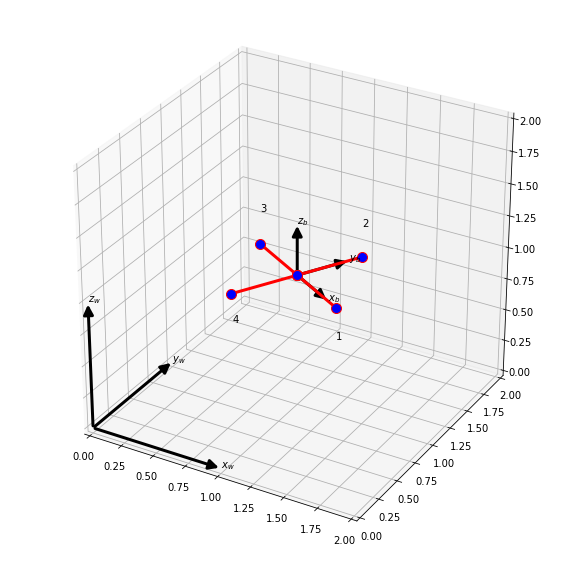

In [31]:
# world coordinate system
origin = np.array([0,0,0])
x = np.array([1,0,0])
y = np.array([0,1,0])
z = np.array([0,0,1])
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111,projection='3d')
x_v = Arrow3D([origin[0],x[0]],[origin[1],x[1]],[origin[2],x[2]],arrowstyle='-|>',color='k',lw=3,mutation_scale=20)
y_v = Arrow3D([origin[0],y[0]],[origin[1],y[1]],[origin[2],y[2]],arrowstyle='-|>',color='k',lw=3,mutation_scale=20)
z_v = Arrow3D([origin[0],z[0]],[origin[1],z[1]],[origin[2],z[2]],arrowstyle='-|>',color='k',lw=3,mutation_scale=20)
ax.add_artist(x_v)
ax.add_artist(y_v)
ax.add_artist(z_v)
ax.text(x[0],x[1],x[2],r'$x_w$')
ax.text(y[0],y[1],y[2],r'$y_w$')
ax.text(z[0],z[1],z[2],r'$z_w$')

# body coordinate system
origin = np.array([1,1,1])
# rotate 30 degree
x = np.array([0.4 * 3**0.5/2,-0.4 * 1/2,0]) + origin
y = np.array([0.4 * 1/2,0.4 * 3**0.5/2,0]) + origin
z = np.array([0,0,0.4]) + origin
# plot quadrotor body
def plot_line(x,y,marker='o',color='r',propeller_size=10):
    line, = ax.plot([x[0],y[0]],
            [x[1],y[1]],
            [x[2],y[2]],
            marker=marker,
            markersize=propeller_size,
            markerfacecolor='blue',
            color=color,lw=3)
    return line
m1_pos = np.array([0.5 * 3**0.5/2,-0.5 *1/2 ,0]) + origin
m2_pos = np.array([0.5 * 1/2,0.5 *3**0.5/2 ,0]) + origin
m3_pos = -np.array([0.5 * 3**0.5/2,-0.5 * 1/2,0]) + origin
m4_pos = -np.array([0.5 * 1/2,0.5 * 3**0.5/2,0]) + origin
motor1 = plot_line(origin,m1_pos)
motor2 = plot_line(origin,m2_pos)
motor3 = plot_line(origin,m3_pos)
motor4 = plot_line(origin,m4_pos)
ax.text(m1_pos[0],m1_pos[1],m1_pos[1],r'$1$')
ax.text(m2_pos[0],m2_pos[1],m2_pos[1]-0.2,r'$2$') # here we adjust the z position to show the graph more better
ax.text(m3_pos[0],m3_pos[1],m3_pos[1],r'$3$')
ax.text(m4_pos[0],m4_pos[1],m4_pos[1]+0.2,r'$4$')
# draw body axes
x_v = Arrow3D([origin[0],x[0]],[origin[1],x[1]],[origin[2],x[2]],arrowstyle='-|>',color='k',lw=3,mutation_scale=20)
y_v = Arrow3D([origin[0],y[0]],[origin[1],y[1]],[origin[2],y[2]],arrowstyle='-|>',color='k',lw=3,mutation_scale=20)
z_v = Arrow3D([origin[0],z[0]],[origin[1],z[1]],[origin[2],z[2]],arrowstyle='-|>',color='k',lw=3,mutation_scale=20)
ax.add_artist(x_v)
ax.add_artist(y_v)
ax.add_artist(z_v)
ax.text(x[0],x[1],x[2],r'$x_b$')
ax.text(y[0],y[1],y[2],r'$y_b$')
ax.text(z[0],z[1],z[2],r'$z_b$')

ax.set_xlim([0,2])
ax.set_ylim([0,2])
ax.set_zlim([0,2])
plt.show()

<center>Figure 1 Coordinate System</center>

When considering describing the attitude of aircraft, we naturely say how it offset from horizon or vertical. This is the source of the Euler angles. <a href="https://en.wikipedia.org/wiki/Euler_angles">Euler angles</a> are three angles describing how transformation be made to get the object current attitude from it's original attitude or from own given frame. There are totally 12 different rotation combinations. And there is also deference between rotation about rotated axes and rotation about fixed world axes, and they are named instrintic and extrintic(see wikipedia for more details). Here we only concerned usually-used rotation order 3-1-2 (instrintic), which mean first rotating around $z_w$ , then around $x_{w}'$ and final around $y_{w}''$, accordingly the angles was named $\psi,\phi,\theta$. By convention, we name <b>yaw,roll</b> and <b>pitch</b> for $\psi,\phi,\theta$ and limit their range -- $\psi\in [-\pi,\pi)$ and $\phi,\theta \in [-\pi/2,\pi/2]$ 

Below is the deduction of rotation matrixes about every axis. Here we assumed that the vector is multiply by matrix at the left i.e. $R \cdot v$, where $R$ is transform matrix, $v$ is a vector. Notice that there are difference between the rotation of axes and rotation of vector. They are mutually inverse transformations and here is the rotation of axes.

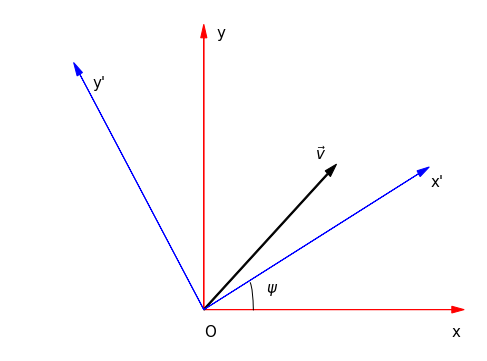

In [32]:
#in x and y axes
i = (2,0)
j = (0,2)
v = (1,1)
i_new = (2*3**0.5/2,2*1/2)
j_new = (2*-1/2,2*3**0.5/2)
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
ax.arrow(0,0,i[0],i[1],color='r',head_width=0.05,head_length=0.1)
ax.arrow(0,0,j[0],j[1],color='r',head_width=0.05,head_length=0.1)
ax.arrow(0,0,v[0],v[1],color='k',width=0.01,head_width=0.06,head_length=0.1)
ax.arrow(0,0,i_new[0],i_new[1],color='b',head_width=0.05,head_length=0.1,linestyle='-')
ax.arrow(0,0,j_new[0],j_new[1],color='b',head_width=0.05,head_length=0.1,linestyle='-')
ax.annotate("",xy=(0.4*3**0.5/2,0.45*0.5),xycoords='data',xytext=(0.4,-0.04), # adjusted to nagtive value
            arrowprops=dict(arrowstyle='-',
                            color='k',
                           shrinkA=5,shrinkB=5,
                           connectionstyle="angle3,angleA=90,angleB=0"))
ax.text(0.5,0.12,'$\psi$',size=15)
ax.text(0,-0.2,'O',size=15)
ax.text(i[0],i[1]-0.2,'x',size=15)
ax.text(j[0]+0.1,j[1],'y',size=15)
ax.text(i_new[0]+0.1,i_new[1]-0.1,"x'",size=15)
ax.text(j_new[0]+0.1,j_new[1]-0.1,"y'",size=15)
ax.text(v[0]-0.1,v[1]+0.1,r'$\vec{v}$',size=15)
ax.set_xlim([-1.4,2.2])
ax.set_ylim([-0.2,2.2])
plt.axis('off')
plt.show()

<center>Figure 2 Rotation Transformation </center>

From above figure, components of $\vec{v}$ in $xOy$ is $x_v,y_v$, and $x'_v,y'_v$ in $x'Oy'$. we can get below equation
\begin{equation}
x'_v = x_v cos(\psi) + y_v sin(\psi)\\
y'_v = -x_v sin(\psi) + y_v cos(\psi)
\end{equation}
Writing it as matrix, we get
\begin{equation}
\begin{bmatrix}
x'_v \\
y'_v
\end{bmatrix} =
\begin{bmatrix}
cos(\psi) & sin(\psi) \\
-sin(\psi) & cos(\psi)
\end{bmatrix}
\begin{bmatrix}
x_v \\
y_v
\end{bmatrix}
\end{equation}
To be more clearly we write the $\vec{v}$ as $x_v \vec{i} + y_v \vec{j}$, $\vec{i}$ and $\vec{j}$ is the unit vector in the direction of x and y axes. Write the equation more literaturely, 
\begin{equation}
\mathbf{v} = x_v\mathbf{i} + y_v\mathbf{j}
\end{equation}
Then transformation equation can be rewriten like this
\begin{equation}
\begin{bmatrix}
x'_v \\
y'_v
\end{bmatrix} = x_v
\begin{bmatrix}
cos(\psi) & sin(\psi) \\
-sin(\psi) & cos(\psi)
\end{bmatrix}
\mathbf{i} + y_v
\begin{bmatrix}
cos(\psi) & sin(\psi) \\
-sin(\psi) & cos(\psi)
\end{bmatrix} 
\mathbf{j}
\end{equation}
So rotation transformation is <a href="https://en.wikipedia.org/wiki/Linear_map">linear transformation</a> on space with base $\mathbf{i}$ and $\mathbf{j}$. So We can understand the rotation transfromation was applied on the base, and the vector consturcted linearly by the base will still be contructed linearly by based transformed before and after the transfermation.

Add z axis, we get the transformation matrix of rotating about z axis,
\begin{equation}
R_z(\psi) = 
\begin{bmatrix}
cos(\psi) & sin(\psi) & 0 \\
-sin(\psi) & cos(\psi) & 0 \\
0 & 0 & 1
\end{bmatrix}.
\end{equation}
Similarly, we get other two transformation matrixes
\begin{equation}
R_x(\phi) = 
\begin{bmatrix}
1 & 0 & 0 \\
0 & cos(\phi) & sin(\phi) \\
0 &-sin(\phi) & cos(\phi)
\end{bmatrix}
\end{equation},
\begin{equation}
R_y(\theta) = 
\begin{bmatrix}
cos(\theta) & 0 & -sin(\theta) \\
0 & 1 & 0 \\
sin(\theta) & 0 & cos(\theta) \\
\end{bmatrix}
\end{equation}

Below is the deduction of rotation matrix using Sympy.

In [33]:
def roll_x(alpha):
    return Matrix([
        [1,0,0],
        [0,cos(alpha),sin(alpha)],
        [0,-sin(alpha),cos(alpha)]
    ])
def roll_y(beta):
    return Matrix([
        [cos(beta),0,-sin(beta)],
        [0,1,0],
        [sin(beta),0,cos(beta)]
    ])
def roll_z(gamma): 
    return Matrix([
        [cos(gamma),sin(gamma),0],
        [-sin(gamma),cos(gamma),0],
        [0,0,1]
    ])
phi,theta,psi = symbols('phi,theta,psi')

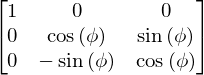

In [34]:
# the transform matrix of rotation of axes
roll_x(phi)

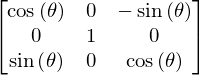

In [35]:
roll_y(theta)

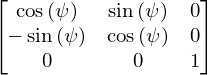

In [36]:
roll_z(psi)

Then 3-1-2 rotation transfrom matrix $R_{wb}$ can be caculated as

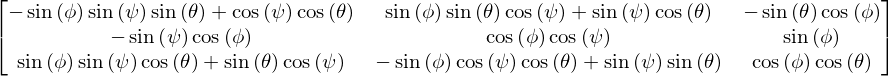

In [37]:
R_w_to_b = roll_y(theta)*roll_x(phi)*roll_z(psi)
R_w_to_b

Above matrix also be called briefly rotation matrix. We can get invert transfrom from body to world by invert the matrix.

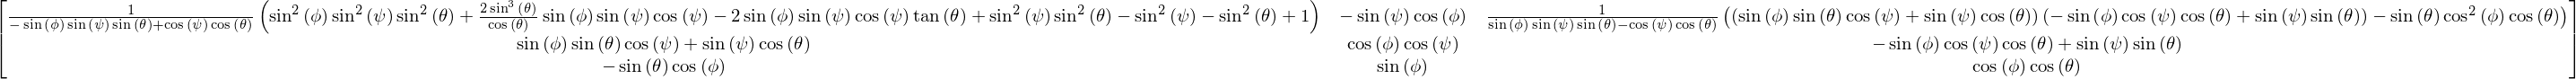

In [38]:
R_b_to_w = simplify(R_w_to_b.inv())
R_b_to_w

It looks ugly. We could also derive the invert rotation matrix by defination as shown below

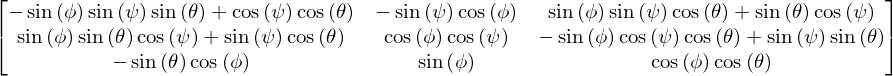

In [39]:
# rotate reverse order in nagtive angle
R_b_to_w = roll_z(-psi) * roll_x(-phi) * roll_y(-theta)
R_b_to_w

Above Matrix can transform forces and moments of actuator in body frame to those in world frame. So we get 
\begin{equation}
R_{bw}=
\begin{bmatrix}
-sin(\phi)sin(\psi)sin(\theta) + cos(\psi)cos(\theta) &  -sin(\psi)cos(\phi) & sin(\phi)sin(\psi)cos(\theta) + sin(\theta)cos(\psi) \\
sin(\phi)sin(\theta)cos(\psi) + sin(\psi)cos(\theta) & cos(\phi)cos(\psi) & -sin(\phi)cos(\psi)cos(\theta) + sin(\psi)sin(theta) \\
-sin(\theta)cos(\phi)   & sin(\phi) & cos(\phi)cos(\theta)
\end{bmatrix}
\end{equation}

### 1.2 Quadrotor Dynamics

Generally Quadrotor Dynamics modelling includes motor and propeller dynamics modelling<sup>[2]</sup> and quadrotor frame dynamics modelling. Here we assume readers already have the knowlegde about mechanics of rigid body. In real flight, the rotation speed of motor is controlled by electric current or more explicitly by PWM/PPM signals. Usually we consider the force and moment generated by a rotating motor equipped with propeller is linear  proportional to square of rotation speed of the motor, i.e. $F = k_F\omega^2$ and $M = k_M\omega^2$. Based on this and annotating $\omega_i$ as the ith rotation speed of corresponding motor, we get 

\begin{equation}
F =
k_F\begin{bmatrix}
1 & 1 & 1 & 1
\end{bmatrix}
\cdot
\begin{bmatrix}
\omega_1^2\\
\omega_2^2\\
\omega_3^2\\
\omega_4^2\\
\end{bmatrix}
\end{equation}
\begin{equation}
\mathbf{M} =
\begin{bmatrix}
0 & k_F L & 0 & -k_F L\\
-k_F L & 0 & k_F L & 0\\
k_M & -k_M & k_M & -k_M\\
\end{bmatrix}
\cdot
\begin{bmatrix}
\omega_1^2\\
\omega_2^2\\
\omega_3^2\\
\omega_4^2\\
\end{bmatrix}
\end{equation}

Now F is in the direction of Z axis in the quadrotor body. So 

\begin{equation}
\mathbf{F} = 
\begin{bmatrix}
0 & 0 & F
\end{bmatrix}^T
\end{equation}

Below is the deduction of moment using Sympy.

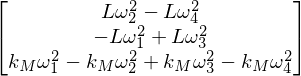

In [40]:
omega_1,omega_2,omega_3,omega_4 = symbols('omega_1,omega_2,omega_3,omega_4')
m,g,L = symbols('m,g,L')
k_F,k_M = symbols('k_F,k_M')
F = symbols('F')
F_b = Matrix([0,0,F])
M = Matrix([[0,L,0,-L],[-L,0,L,0],[k_M,-k_M,k_M,-k_M]])*Matrix([omega_1**2,omega_2**2,omega_3**2,omega_4**2])
M

Project $\mathbf{F}$ to world frame, we get the <b>Newton's Equations of Motion</b>
\begin{equation}
m\ddot{r} = 
\begin{bmatrix}
0\\0\\-mg
\end{bmatrix} + R_{bw}
\begin{bmatrix}
0\\0\\F
\end{bmatrix}
\label{newtonequation}
\end{equation}

Denoted $\omega_x,\omega_y,\omega_z$ as the anguler velocities of quadrotor, we get <b>Euler's Equations of Motion</b>
\begin{equation}
\mathbf{I}\begin{bmatrix}
\dot{\omega_x} \\ \dot \omega_y \\ \dot \omega_z
\end{bmatrix} = \mathbf{M} -  
\begin{bmatrix}
\omega_x \\ \omega_y \\ \omega_z
\end{bmatrix}
\times
\mathbf{I}\begin{bmatrix}
\omega_x \\ \omega_y \\ \omega_z
\end{bmatrix}
\label{eulerequation}
\end{equation}

Below is the expandation of right part of Newton's Equations of Motion using Sympy.

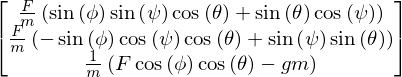

In [41]:
# right part of Newton's Equations of Motion
F = symbols('F')
F_w = Matrix([0,0,-m*g]) + R_b_to_w * F_b
r_dd = F_w/m
r_dd

# 2 Quadrotor Control

For quadrotor control problem (as a part of Gudiance-Navigation-Control), generally we consider situation illustrated below. There are some points which may generated by trajectory or given by people. The quadrotor's task is to go through these points satisfing some limit on the elapsed time and trace error.

Below is a simple illustration of trace following.

/home/marxlp/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:5: DeprecationWarning: `spline` is deprecated!
spline is deprecated in scipy 0.19.0, use Bspline class instead.


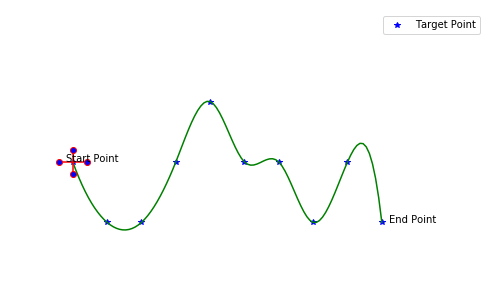

In [42]:
from scipy.interpolate import spline
y = np.random.randint(0,3,10)
x = np.arange(0,len(y))
xnew = np.linspace(x.min(),x.max(),100)
y_smooth = spline(x,y,xnew)
fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot(111)
ax.plot(x,y,'b*',label='Target Point')
ax.plot(xnew,y_smooth,'g-')
ax.plot([x[0]-0.4,x[0]+0.4],[y[0],y[0]],'ro-',markerfacecolor='b')
ax.plot([x[0],x[0]],[y[0]+0.2,y[0]-0.2],'ro-',markerfacecolor='b')
ax.set_xlim(-1,12)
ax.set_ylim(-1,3.5)
ax.text(x[0]-0.2,y[0],'Start Point')
ax.text(x[-1]+0.2,y[-1],'End Point')
ax.legend()
plt.axis('off')
plt.show()

<center>Figure 3 Path Trace</center>

So control problem could be discribed as below:  
<b>Given position or more instruction signals like velocity and acceleration, decide the anglular velocities of every motor.</b>  
Due to the directly relation between the force of propeller and the angle velocity of motor, we can descibe above problem like  
<b>Given position or more instruction signals like velocity and acceleration, decide the force of every motor.</b>  

\begin{equation}
(\ddot r_{i,T} - \ddot r_{i}^{des}) + K_{P,r_i}(r_{i,T}-r_{i}) + K_{I,r_i}\int (r_{i,T}- r_i)dt + K_{D,r_i}(\dot r_{i,T} - \dot r_{i}) = 0
\label{pid}
\end{equation}

Considering classic PID controller, 
where $r_i$ is $i$th component of real-time position of quadrotor, $r_{i,T}$ is $i$th target position which is given by people and $r_i^{des}$ is ith desired position. From above equation we can caculate desired position $r_i^{des}$when $r_{i,T}$, $r_{i}$ and their derivative and integral are known.  
There are obvious connection between $\ddot r$ and total force $F$ according Newton's equations of motion $\ref{newtonequation}$. Therefore we can directly figure out the total $F$ after solving below equations when attitude angles can be calculated from real-time sensor data in quadrotor.

\begin{equation}
\begin{bmatrix}
\ddot r_1\\ \ddot r_2\\ \ddot r_3
\end{bmatrix} =
\left[\begin{matrix}\frac{F}{m} \left(\sin{\left (\phi \right )} \sin{\left (\psi \right )} \cos{\left (\theta \right )} + \sin{\left (\theta \right )} \cos{\left (\psi \right )}\right)\\\frac{F}{m} \left(- \sin{\left (\phi \right )} \cos{\left (\psi \right )} \cos{\left (\theta \right )} + \sin{\left (\psi \right )} \sin{\left (\theta \right )}\right)\\\frac{1}{m} \left(F \cos{\left (\phi \right )} \cos{\left (\theta \right )} - g m\right)\end{matrix}\right]
\label{fequation}
\end{equation}

But above equations are not always have unique solution for $F$. Besides problem of the <b>singluarity (problem1)</b> of solution, we cannot find the solution for force of every rotor just by total force $F$. Still <b>other three equations (problem2)</b> are needed for solving all forces of four rotors. Euler's equations of motion \ref{eulerequation} may be helpful. But the relation between the $\ddot r$ and Euler's euqations is not obvious.

Blow code check the singluarity of solution of $F$.

In [43]:
# check the singluarities of solution for F
# theta=0.3 rad, phi=0.3 rad, psi=0.2 rad, g=9.18 m/s^2, m=1 kg, r_dd=[1 1 1]^T
eq = r_dd.subs(theta,0.3).subs(phi,0.3).subs(psi,0.2).subs(g,9.18).subs(m,1) - Matrix([1,1,1])
eqs =(eq[0],eq[1],eq[2])
print(eqs)
solve(eqs,F)

(0.345718048789445*F - 1, -0.217982806608217*F - 1, 0.912667807454839*F - 10.18)


To solve above two problems. We may let two angles be free variable in \ref{fequation}. Then problem 1 will be solved and problem2 will be solved partly by used Euler's equations. Consider it more precisely, since $\phi$ and $\theta$ is symmetrical in description of attitude of quadrotor, choosing it may be a good start. 

Below code try solve $\phi$ and $\theta$ from equations \ref{fequation} as $\psi$ is fixed, which mean its value was decided by sensors.

```python
rdd_1,rdd_2,rdd_3 = symbols('rdd_1,rdd_2,rdd_3')
eqs = r_dd - Matrix([rdd_1,rdd_2,rdd_3])
solve((eqs[0],eqs[1],eqs[2]),theta,phi,F)
```

I try above code. But It keep solving for ten minutes without output. So I interrupted it and turned it to markdown code. 

Below figure show the solutions for $\theta$ and $\phi$, 

/home/marxlp/anaconda3/lib/python3.5/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


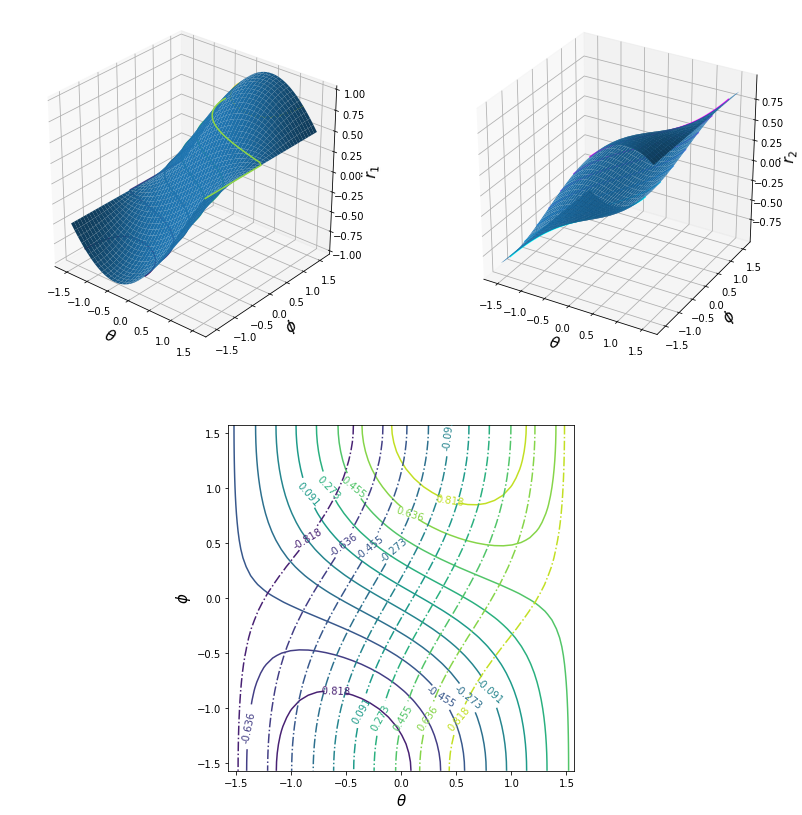

In [44]:
from IPython.html.widgets import *
from matplotlib import cm

theta_num = np.linspace(-np.pi/2,np.pi/2,40)
phi_num = theta_num
psi_num = np.pi/3
theta_num,phi_num = np.meshgrid(theta_num,phi_num)
rdd_1_num = np.cos(theta_num)*np.sin(phi_num)*np.sin(psi_num) + np.sin(theta_num)*np.cos(psi_num)
rdd_2_num = -np.sin(phi_num)*np.cos(psi_num)*np.cos(theta_num) + np.sin(psi_num)*np.sin(theta_num)

fig = plt.figure(figsize=(14,14))
ax = fig.add_subplot(221,projection='3d')
surf_1 = ax.plot_surface(theta_num,phi_num,rdd_1_num)#,alpha=0.4)
cont_1 = ax.contour(theta_num,phi_num,rdd_1_num,color='r')
ax.view_init(30,-50)
ax.set_xlabel(r'$\theta$',size=15)
ax.set_ylabel(r'$\phi$',size=15)
ax.set_zlabel(r'$\ddot r_1$',size=15)

ax2 = fig.add_subplot(222,projection='3d')
surf_2 = ax2.plot_surface(theta_num,phi_num,rdd_2_num)
cont_2 = ax2.contour(theta_num,phi_num,rdd_2_num,cmap=cm.cool)
ax2.set_xlabel(r'$\theta$',size=15)
ax2.set_ylabel(r'$\phi$',size=15)
ax2.set_zlabel(r'$\ddot r_2$',size=15)

ax3 = fig.add_subplot(212)
cont_1 = ax3.contour(theta_num,phi_num,rdd_1_num,np.linspace(-1,1,12),zdir='z',offset=-1,color='r')
cont_2 = ax3.contour(theta_num,phi_num,rdd_2_num,np.linspace(-1,1,12),zdir='z',offset=-1,linestyles='-.')
ax3.clabel(cont_1,cont_1.levels,inline=True,fontsize=10)
ax3.clabel(cont_2,cont_2.levels,inline=True,fontsize=10)
# set aspect to 1:1
ax3.set_aspect('equal')
ax3.set_xlabel(r'$\theta$',size=15)
ax3.set_ylabel(r'$\phi$',size=15)

plt.show()


<center>Figure 4 Upper is mesh surface for Equation Given different $\ddot r$. Below is the contours of two mesh surface. cross points are solutions for $\theta$ and $\phi$</center>

From above figure, although It looks like there are unique solutions for $\theta$ and $\phi$, if given $\ddot r_1$, $\ddot r_1$ as $F$ has been derterminated, it's diffcult to find a analytical solution for equations \ref{fequation}. At the same time, numerical solving method is not practical when applied in quadrotor's embedded system, we need to consider simplifying the problem.

At most time quadrotor's pitch and roll angles are small and angle velocities small too. Therefore linearizing the equation may be a good idea. From $\theta$ and $\phi$ close to zero, we get $sin(\theta) \sim \theta, sin(\phi) \sim \phi, cos(\theta) \sim 1, cos(\phi) \sim 1$. Then the equations \ref{fequation} can be simplified as

\begin{equation}
\ddot r_1 = \frac{F}{m}(\theta cos(\psi) + \phi sin(\psi)\\
\ddot r_2 = \frac{F}{m}(\theta sin(\psi) - \phi cos(\psi)\\
\ddot r_3 = \frac{1}{m}F - g
\label{control1}
\end{equation}

Where $\psi$ is given by sensors. If given $\mathbf{\ddot r^{des}}$, we can caculate $\theta^{des}$ and $\phi^{des}$ like below

In [45]:
eq1 = rdd_1 - (F/m*(theta*cos(psi) + phi*sin(psi)))
eq2 = rdd_2 - (F/m*(theta*sin(psi) - phi*cos(psi)))
eq3 = rdd_3 - (F/m -g)
solve((eq1,eq2,eq3),theta,phi,F)

NameError: name 'rdd_1' is not defined

So we get
\begin{equation}
\theta^{des} = \frac{\ddot r^{des}_1 cos(\psi) + \ddot r^{des}_2 sin(\psi)}{g + \ddot r^{des}_3}\\
\phi^{des} = \frac{\ddot r^{des}_1 sin(\psi) - \ddot r^{des}_2 cos(\psi)}{g + \ddot r^{des}_3}\\
F = m(g + \ddot r^{des}_3)
\label{newton_equation2}
\end{equation}

If we go more radically, we can assume the $\ddot r^{des}_3 \sim 0$, which means quadrotor is in hovering state at most time. Then we get
\begin{equation}
\theta^{des} = \frac{1}{g} (\ddot r^{des}_1 cos(\psi) - \ddot r^{des}_2 sin(\psi))\\
\phi^{des} = \frac{1}{g} (-\ddot r^{des}_1 sin(\psi) - \ddot r^{des}_2 cos(\psi))
\label{linear_equation}
\end{equation}

Now we get $\theta^{des}$ and $\phi^{des}$. To get the desired angle, Euler's equations of motion come up in our mind. But it $\psi^{des}$ is unknown. We can sovle problem by two way: just ignoring it, which means using current $\psi$ from sensors when caclulating, or giving $\psi^{des}$. In Most cases, we need control the $\psi$ such as taking video using quadrotor. So there is a $\psi^{des}$ from path-trace command generator(or <b>commander</b>). Now we could construct a PID controller like \ref{pid}  

\begin{equation}
(\ddot \alpha_{T} - \ddot \alpha^{des}) + K_{P,\alpha}(\alpha_{T}-\alpha) + K_{I,\alpha}\int (\alpha_{T}- \alpha)dt + K_{D,\alpha}(\dot \alpha_{T} - \dot \alpha) = 0
\label{angle_pid}
\end{equation}

Here $\alpha$ was used to represent $\phi$,$\theta$ and $\psi$. From above equation, we can calculate the angluar acceleration and then substitute to Euler's equation then we get another three equations for solving force $F_i$ of every rotor.
To let it more clearly, we substitute $\phi^{des}$,$\theta^{des}$ and $\psi^{des}$ to the Euler's equation.

\begin{equation}
\mathbf{I}R_{wb} 
\begin{bmatrix}
\ddot \phi^{des}\\
\ddot \theta^{des}\\
\ddot \psi^{des}
\end{bmatrix} = 
\mathbf{M} - 
\begin{bmatrix}
\omega_x\\
\omega_y\\
\omega_z
\end{bmatrix}\times \mathbf{I}
\begin{bmatrix}
\omega_x\\
\omega_y\\
\omega_z
\end{bmatrix}
\end{equation}

Expand the $\mathbf{M}$ we get,

\begin{equation}
\begin{bmatrix}
0 & k_F L & 0 & -k_F L\\
-k_F L & 0 & k_F L & 0\\
k_M & -k_M & k_M & -k_M\\
\end{bmatrix}
\cdot
\begin{bmatrix}
\omega_1^2\\
\omega_2^2\\
\omega_3^2\\
\omega_4^2\\
\end{bmatrix}=
\mathbf{I}R_{wb} 
\begin{bmatrix}
\ddot \phi^{des}\\
\ddot\theta^{des}\\
\ddot\psi^{des}
\end{bmatrix} + 
\begin{bmatrix}
\omega_x\\
\omega_y\\
\omega_z
\end{bmatrix}\times \mathbf{I}
\begin{bmatrix}
\omega_x\\
\omega_y\\
\omega_z
\end{bmatrix}
\label{control3}
\end{equation}

Add the adjusted third equations in the \ref{control1}
\begin{equation}
[k_F,k_F,k_F,k_F]
\begin{bmatrix}
\omega_1^2\\
\omega_2^2\\
\omega_3^2\\
\omega_4^2
\end{bmatrix}=
m \ddot r_3^{des} - mg 
\label{control4}
\end{equation}

All above, we get position command $\mathbf{r}_T$ and angle command $\psi_T$ (generally with $\dot \psi_T$), then calcualte $\ddot r_1^{des}, \ddot r_2^{des}, \ddot r_3^{des}, \ddot \phi^{des},\ddot \theta^{des} and \ddot \psi^{des}$ from PID controller \ref{pid} and \ref{angle_pid} by using \ref{linear_equation}, and finally caculate the rotation speed of rotors $\omega_1$,$\omega_2$,$\omega_3$,$\omega_4$ from third equation of Newton's equations \ref{newton_equation2} and Euler's equation \ref{control3}. 

Control loops shown like below.

In [ ]:
import matplotlib.patches as mpatches
from matplotlib.collections import PatchCollection
patches = []
fig = plt.figure(figsize=(24,12))
ax = fig.add_subplot(111)
pos_in = mpatches.Rectangle([-0.2,0.1],0.3,0.3)
ax.text(-0.18,0.23,r'$Commander$',size=15)
ax.arrow(0.1,0.1+0.1,0.19,0,color='k',head_width=0.02,head_length=0.02)
patches.append(pos_in)

pos_controller = mpatches.Rectangle([0.31,0.1],0.4,0.3)
ax.text(0.32,0.23,r'Position Controller',size=15)
ax.arrow(0.71,0.2,0.19,0,color='k',head_width=0.02,head_length=0.02)
patches.append(pos_controller)


attitude_controller = mpatches.Rectangle([0.92,0.1],0.4,0.2)
ax.text(0.93,0.18,r'Attitude Controller',size=15)
ax.arrow(1.32,0.2,0.09,0,color='k',head_width=0.02,head_length=0.02)
patches.append(attitude_controller)

motor_dynamic = mpatches.Rectangle([1.43,0.1],0.34,0.3)
ax.text(1.44,0.23,r'Motor Dynamics',size=15)
ax.arrow(1.77,0.23,0.1,0,color='k',head_width=0.02,head_length=0.02)
patches.append(motor_dynamic)
# Connect the position controller and Quadrotor Dynamics
ax.arrow(0.71,0.32,0.70,0,color='k',head_width=0.02,head_length=0.02)

quadrotor_dynamic = mpatches.Rectangle([1.89,0.1],0.5,0.3)
ax.text(1.91,0.23,r'Quadrotor Dynamics',size=15)
patches.append(quadrotor_dynamic)

collection = PatchCollection(patches,cmap=plt.cm.hsv,alpha=0.3)
ax.add_collection(collection)

ax.plot([2.39,2.5,2.5,0.88],[0.23,0.23,0.04,0.04],color='k')
ax.plot([2.5,2.5,0.26],[0.06,-0.02,-0.02],color='k')
ax.arrow(0.88,0.04,0,0.14,color='k',head_width=0.02,head_length=0.02)
ax.arrow(0.26,-0.02,0,0.20,color='k',head_width=0.02,head_length=0.02)

ax.text(1.3,0.06,r'$\dot \mathbf{\omega},\mathbf{\omega}$',size=15)
ax.text(0.43,0.0,r'$\int \!\!\! \int\mathbf{\ddot r}, \int \mathbf{\ddot r},  \mathbf{\ddot r}$',size=15)
ax.text(0.10,0.21,r'$\mathbf{r_T},\psi_T$',size=15)
ax.text(0.71,0.21,r'$\psi_T,\theta_T,\psi_T$',size=15)
ax.text(1.1,0.33,r'$\Delta \omega_{i,F}$',size=15)
ax.text(1.32,0.22,r'$\Delta \mathbf{\omega_{i,\alpha}}$',size=15)
ax.text(1.78,0.24,r'$F,\mathbf{M}$',size=15)
ax.set_axis_off()
ax.set_aspect('equal')
ax.set_xlim((-0.3,3))
ax.set_ylim((-0.1,0.6))
plt.show()

<center>Figure 5 The nested control loops for position and attitude control. </center>

Notice that we derivate $\omega$ to get $\dot \omega$ and integate $\ddot r$ to get velocity and position. Because, in implement, gyroscope, which gets angle velocity, and accelerator, which gets acceleration, are usually the main two sensors for attitude and position controller. At the same time, the figure does not give quadrotor's current attitude angles, which can be determined by some different methods beyond the scope of this notebook.

If quadrotor in the nominal hovering state, we get $\omega_x \sim \dot \phi, \omega_y \sim \dot\theta, \omega_z \sim \dot\psi$. Besides, we set the desired angular acceleration to be zero $\dot \omega_{x,T} = \dot \omega_{y,T} = \dot \omega_{z,T} = 0$. So the \ref{angle_pid} can be explicitly rewrite as
\begin{equation}
\ddot \phi^{des} = k_{p,\phi}(\phi^{des} - \phi) + k_{d,\phi}(\omega_x^{des} - \omega_x) \\
\ddot \theta^{des} = k_{p,\theta}(\theta^{des} - \theta) + k_{d,\theta}(\omega_y^{des} - \omega_y)\\
\ddot \psi^{des} = k_{p,\psi}(\psi^{des} - \psi) + k_{d,\psi}(\omega_z^{des} - \omega_z)
\end{equation}
Notice that we use $\omega_x^{des},\omega_y^{des}$ substitute $\omega_{x,T},\omega_{y,T}$ Because they are not given by commander but inner variables. At the same time, we want the $\omega_{x,T},\omega_{y,T}$ as small as possible. Therefore set $\omega_{x,des} = \omega_{y,des} = 0$， while $\omega_{z,des}$ was given by commander.

Now the design of quadrotor's controller is finished.

### Reference
[1] https://en.wikipedia.org/wiki/Euler_angles

[2] Gabriel M. Hoffmann, Haomiao Huang, Steven L. Waslander etc. Quadrotor Helicopter Flight Dynamics and Control:
Theory and Experiment[C]. AIAA Guidance, Navigation and Control Conference and Exhibit, 2007. 

[3] Mark Johnson Cutler, Design and Control of an Autonomous
Variable-Pitch Quadrotor Helicopter[D]. 2010.